## Enfermedades cardiacas - implementacion de KNN

Contexto:

Las enfermedades cardíacas, también conocidas como enfermedades cardiovasculares, son un término amplio que se utiliza para referirse a las enfermedades y afecciones que afectan al corazón y al sistema circulatorio. Son una de las principales causas de discapacidad en todo el mundo. Dado que el corazón es uno de los órganos más vitales del cuerpo, sus enfermedades afectan también a otros órganos y partes del cuerpo. Existen varios tipos y formas diferentes de enfermedades cardíacas. Las más comunes causan estrechamiento u obstrucción de las arterias coronarias, mal funcionamiento de las válvulas del corazón, aumento del tamaño del corazón y otras que provocan insuficiencia cardíaca y ataques cardíacos».


Datos clave según la OMS (Organización Mundial de la Salud)
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo.
Se estima que 17,9 millones de personas murieron por ECV en 2019, lo que representa el 32 % de todas las muertes a nivel mundial. De estas muertes, el 85 % se debieron a infartos y accidentes cerebrovasculares.
Más de tres cuartas partes de las muertes por ECV se producen en países de ingresos bajos y medios.
De los 17 millones de muertes prematuras (antes de los 70 años) por enfermedades no transmisibles en 2019, el 38 % se debieron a ECV.
La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales, como el consumo de tabaco, la alimentación poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol.
Es importante detectar las enfermedades cardiovasculares lo antes posible para poder comenzar el tratamiento con asesoramiento y medicamentos.

In [23]:
# librerias necesarias
import numpy as np
import pandas as pd # leer arachivos .csv y mas cosas cientificas
from  scipy import stats
import seaborn as sns # hijo d eplot: para graficas
import matplotlib.pyplot as plt # base para graficas
from scipy.stats import uniform
from scipy.stats import kurtosis
from scipy.stats import skew

In [24]:
data = pd.read_csv("heart.csv")
print('shape de la infromacion es' , data.shape)
# poner que es cada encabezado de d ela columnas
data.head()

shape de la infromacion es (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Integridad de los datos

In [25]:
def limpiar_todos_los_rangos(data):
    # Definir límites para cada columna
    limites = {
        'age': (0, 120),
        'trestbps': (80, 250),
        'chol': (100, 600),
        'thalach': (60, 220),
        'oldpeak': (0, 10),
        'ca': (0, 3),
        'cp': (0, 3),
        'thal': (0, 3),
        'restecg': (0, 2),
        'slope': (0, 2)
    }
    
    filas_originales = data.shape[0]
    
    for columna, (min_val, max_val) in limites.items():
        if columna in data.columns:
            mask = (data[columna] < min_val) | (data[columna] > max_val)
            filas_fuera_rango = mask.sum()
            if filas_fuera_rango > 0:
                print(f"Eliminando {filas_fuera_rango} filas fuera de rango en '{columna}'")
                data = data[~mask]
    
    filas_finales = data.shape[0]
    print(f"Filas eliminadas: {filas_originales - filas_finales}")
    print(f"Dataset final: {data.shape}")
    
    return data

# Aplicar la limpieza completa
data = limpiar_todos_los_rangos(data)

Eliminando 5 filas fuera de rango en 'ca'
Filas eliminadas: 5
Dataset final: (298, 14)


In [26]:
# mostar si los datos esta todos completos en cada columna 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    int64  
 1   sex       298 non-null    int64  
 2   cp        298 non-null    int64  
 3   trestbps  298 non-null    int64  
 4   chol      298 non-null    int64  
 5   fbs       298 non-null    int64  
 6   restecg   298 non-null    int64  
 7   thalach   298 non-null    int64  
 8   exang     298 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    int64  
 11  ca        298 non-null    int64  
 12  thal      298 non-null    int64  
 13  target    298 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.9 KB


## Caracteristicas numericas 

In [27]:
#observar los valores unicos
def get_unique_values (df):
  output_data = []
  for col in df.columns:
    # si el numero de valores unicos es menor o igual a 10
    if df.loc[ :, col].nunique() <=10:
      # obtenemos los valores unicos en la columna
      unique_values = df.loc[ :,col].unique()
      # agregamos  el nombre de la columa, el numero de valores
      # unicos y los datos unicos.
      output_data.append([col, df.loc[ :, col].nunique(),
                          unique_values, df.loc[ :, col].dtype])
    else:
        # en cada caso contrario, agrega solamente el nombre de la
        # columna, el numero de valores unicos y el tipo de dato.
        output_data.append([col, df.loc[ :, col].nunique(),
                            "-",df.loc[:, col].dtype])
  output_df = pd.DataFrame(output_data, columns = ["columns name",
                                                    "Number of unique Values", "Unique values",
                                                    "Data type"])
  return output_df


get_unique_values(data)

,columns name,Number of unique Values,Unique values,Data type
0,age,41,-,int64
1,sex,2,"[1, 0]",int64
2,cp,4,"[3, 2, 1, 0]",int64
3,trestbps,49,-,int64
4,chol,152,-,int64
5,fbs,2,"[1, 0]",int64
6,restecg,3,"[0, 1, 2]",int64
7,thalach,91,-,int64
8,exang,2,"[0, 1]",int64
9,oldpeak,40,-,float64


In [28]:
#resumen de estadistica  basica de caracteristicas 
data.describe().T
# Esta función genera un resumen estadístico descriptivo del DataFrame y lo transpone (.T)
# para una mejor visualización, mostrando las estadísticas por columnas en lugar de filas.
#
# data.describe() calcula las siguientes estadísticas para cada columna numérica:
# - count: Número de valores no nulos
# - mean: Promedio o media aritmética
# - std: Desviación estándar (medida de dispersión)
# - min: Valor mínimo
# - 25%: Primer cuartil (percentil 25)
# - 50%: Mediana (percentil 50)
# - 75%: Tercer cuartil (percentil 75)
# - max: Valor máximo
#
# Al aplicar .T (transposición), las columnas originales se convierten en filas y las
# estadísticas se convierten en columnas, facilitando la lectura del resumen.

,count,mean,std,min,25%,50%,75%,max
age,298.0,54.510067,9.030526,29.0,48.0,56.0,61.00,77.0
sex,298.0,0.677852,0.468085,0.0,0.0,1.0,1.00,1.0
cp,298.0,0.959732,1.033963,0.0,0.0,1.0,2.00,3.0
trestbps,298.0,131.580537,17.669293,94.0,120.0,130.0,140.00,200.0
chol,298.0,246.906040,51.893097,126.0,211.0,241.5,275.00,564.0
fbs,298.0,0.147651,0.355350,0.0,0.0,0.0,0.00,1.0
restecg,298.0,0.523490,0.526521,0.0,0.0,1.0,1.00,2.0
thalach,298.0,149.466443,22.983830,71.0,133.0,152.5,165.75,202.0
exang,298.0,0.328859,0.470589,0.0,0.0,0.0,1.00,1.0
oldpeak,298.0,1.055369,1.164162,0.0,0.0,0.8,1.60,6.2


## Caracteristicas categoricas

In [29]:
#data.describe(include='object').T # en este caso no hay funciones categoricas


# Esta función genera un resumen estadístico específico para columnas de tipo objeto (strings/categóricas)
# y lo transpone (.T) para una mejor visualización.
#
# data.describe(include='object') calcula las siguientes estadísticas para cada columna de texto/categórica:
# - count: Número de valores no nulos
# - unique: Cantidad de valores únicos distintos
# - top: Valor más frecuente (moda)
# - freq: Frecuencia del valor más común (cuántas veces aparece el valor 'top')
#
# Al aplicar .T (transposición), las columnas originales se convierten en filas y las
# estadísticas se convierten en columnas, facilitando la lectura del resumen.

## Renombramiento de las columnas para mejor legibilidad

In [30]:
# se le hara un renombramiento de los datos para mejorar la legibilidad de las comulas y tener
# una mejor nocion de que es cada columna
data.rename(columns={
    'age': 'edad',
    'sex': 'sexo',
    'cp': 'tipo_dolor_toracico',
    'trestbps': 'presion_arterial_reposo',
    'chol': 'colesterol_serico',
    'fbs': 'glucosa_ayunas_alta',
    'restecg': 'electro_reposo',
    'thalach': 'frecuencia_cardiaca_max',
    'exang': 'angina_induccion_ejercicio',
    'oldpeak': 'depresion_st_ejercicio',
    'slope': 'pendiente_st_max',
    'ca': 'numero_vasos_principales',
    'thal': 'resultado_prueba_thalio',
    'target': 'enfermedad_cardiaca'
}, inplace=True)

# virificar que los nombres se hayan cambiando correctamente
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   edad                        298 non-null    int64  
 1   sexo                        298 non-null    int64  
 2   tipo_dolor_toracico         298 non-null    int64  
 3   presion_arterial_reposo     298 non-null    int64  
 4   colesterol_serico           298 non-null    int64  
 5   glucosa_ayunas_alta         298 non-null    int64  
 6   electro_reposo              298 non-null    int64  
 7   frecuencia_cardiaca_max     298 non-null    int64  
 8   angina_induccion_ejercicio  298 non-null    int64  
 9   depresion_st_ejercicio      298 non-null    float64
 10  pendiente_st_max            298 non-null    int64  
 11  numero_vasos_principales    298 non-null    int64  
 12  resultado_prueba_thalio     298 non-null    int64  
 13  enfermedad_cardiaca         298 non-null

In [31]:
get_unique_values(data)

,columns name,Number of unique Values,Unique values,Data type
0,edad,41,-,int64
1,sexo,2,"[1, 0]",int64
2,tipo_dolor_toracico,4,"[3, 2, 1, 0]",int64
3,presion_arterial_reposo,49,-,int64
4,colesterol_serico,152,-,int64
5,glucosa_ayunas_alta,2,"[1, 0]",int64
6,electro_reposo,3,"[0, 1, 2]",int64
7,frecuencia_cardiaca_max,91,-,int64
8,angina_induccion_ejercicio,2,"[0, 1]",int64
9,depresion_st_ejercicio,40,-,float64


## Visualizacion de los datos
- Graficas de distribuacion de los datos

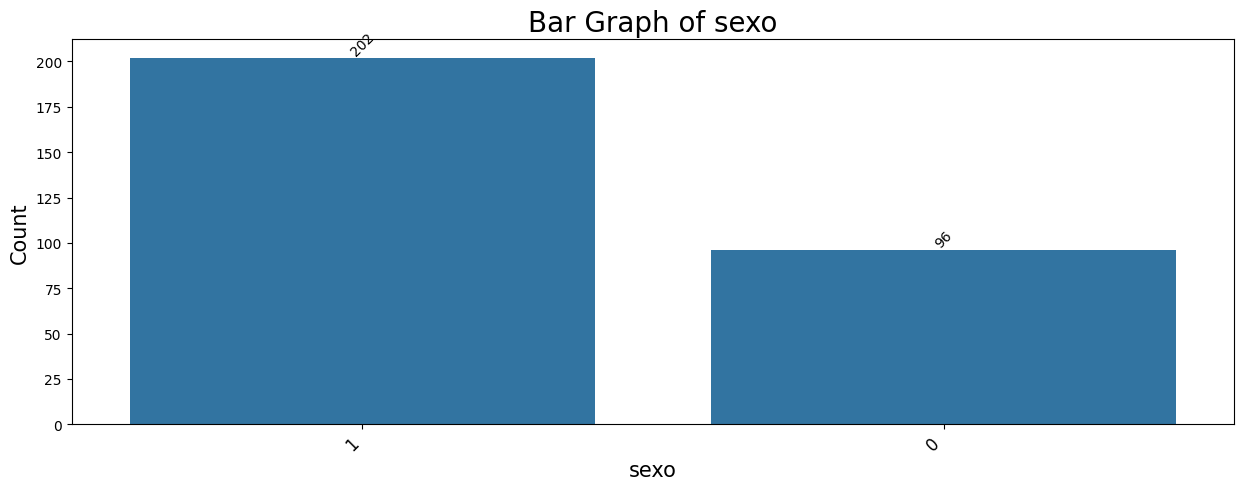

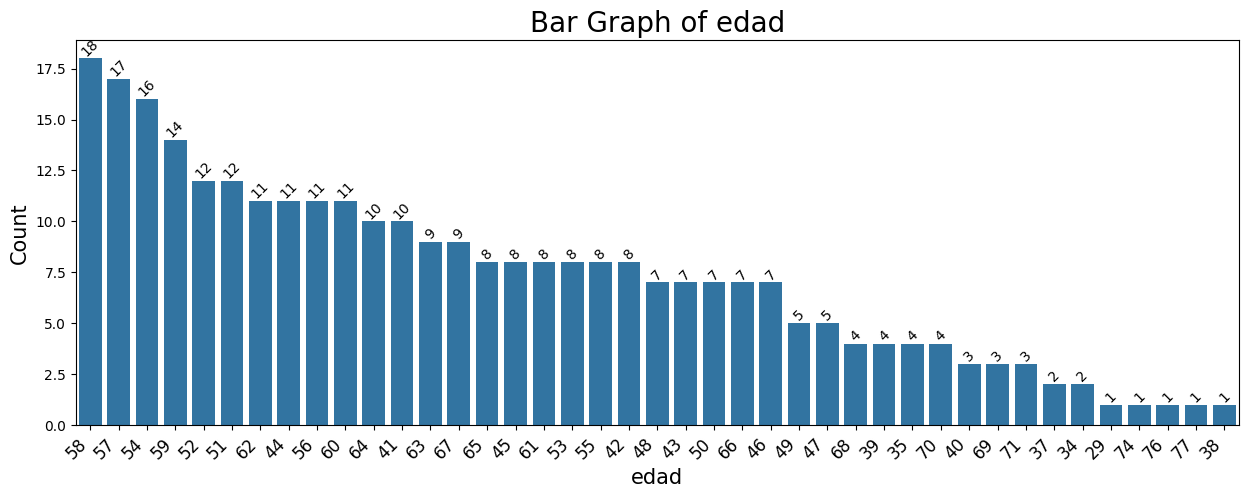

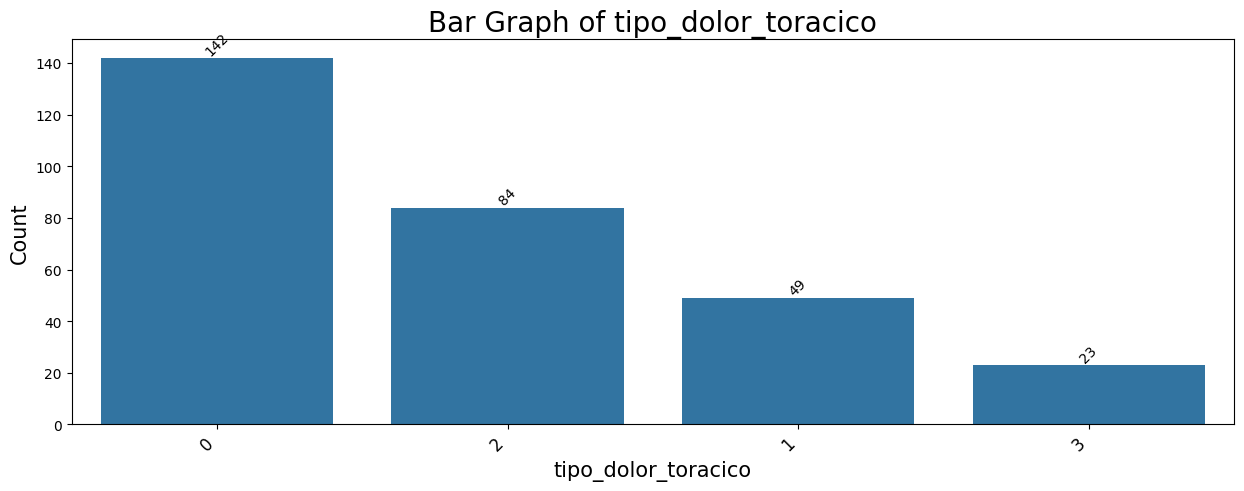

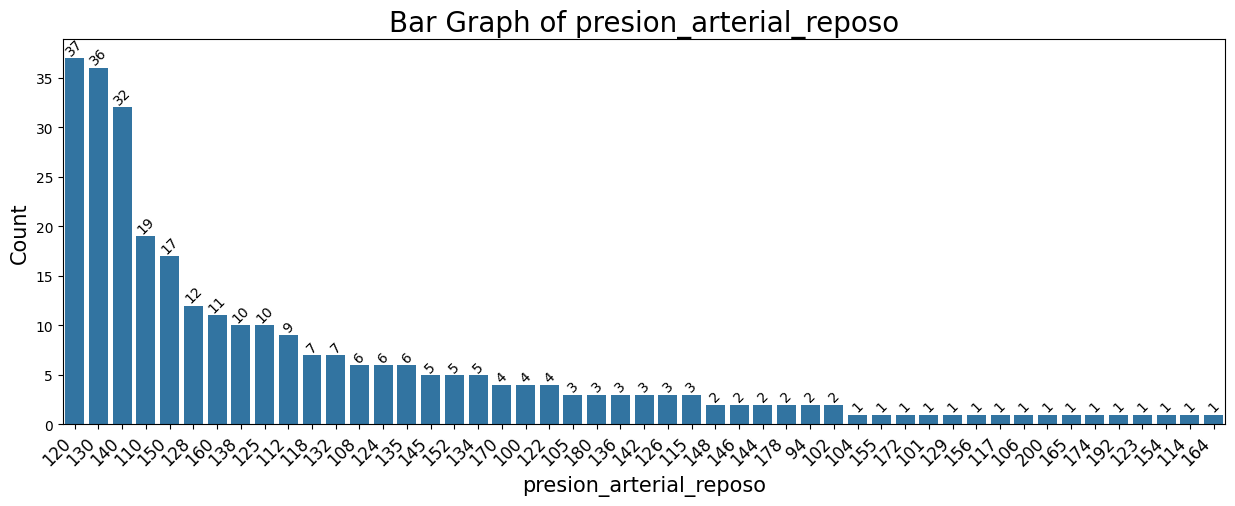

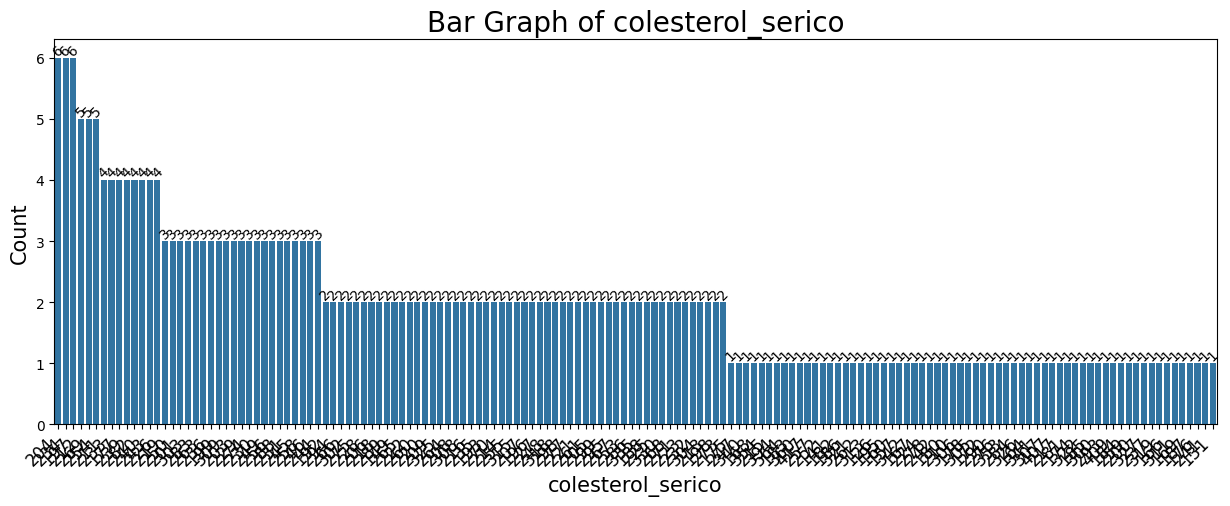

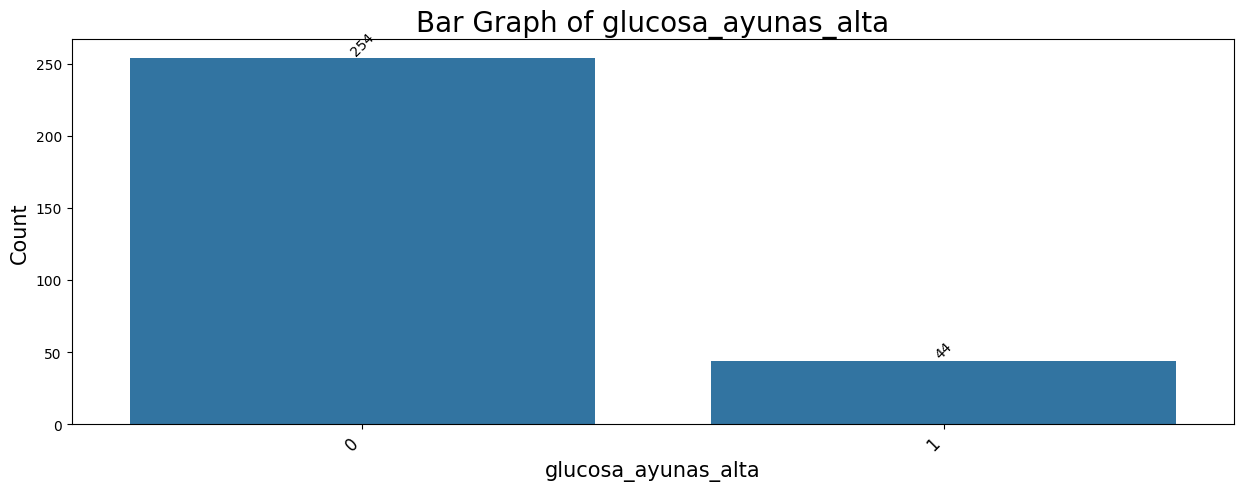

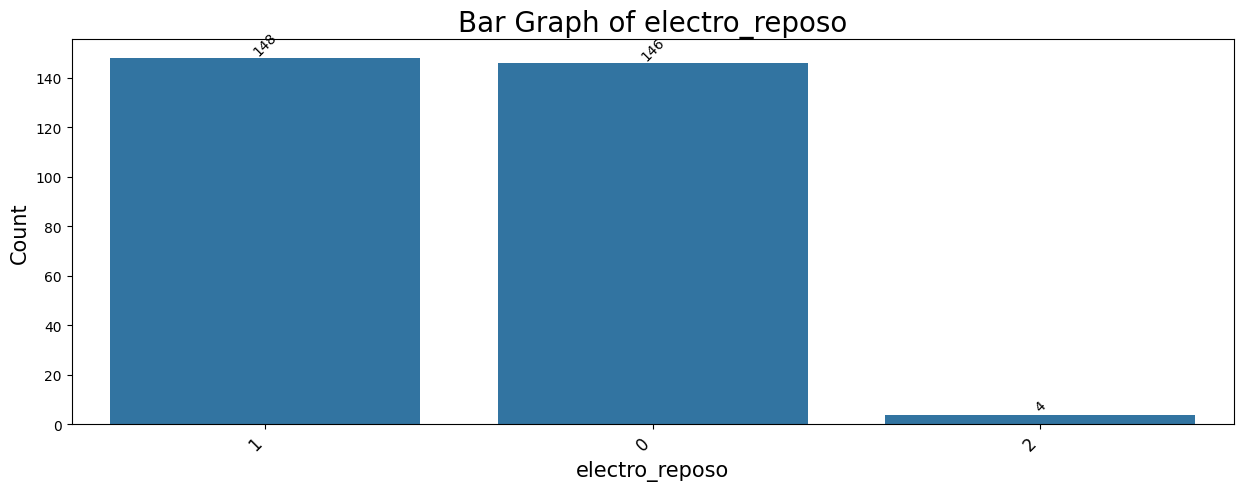

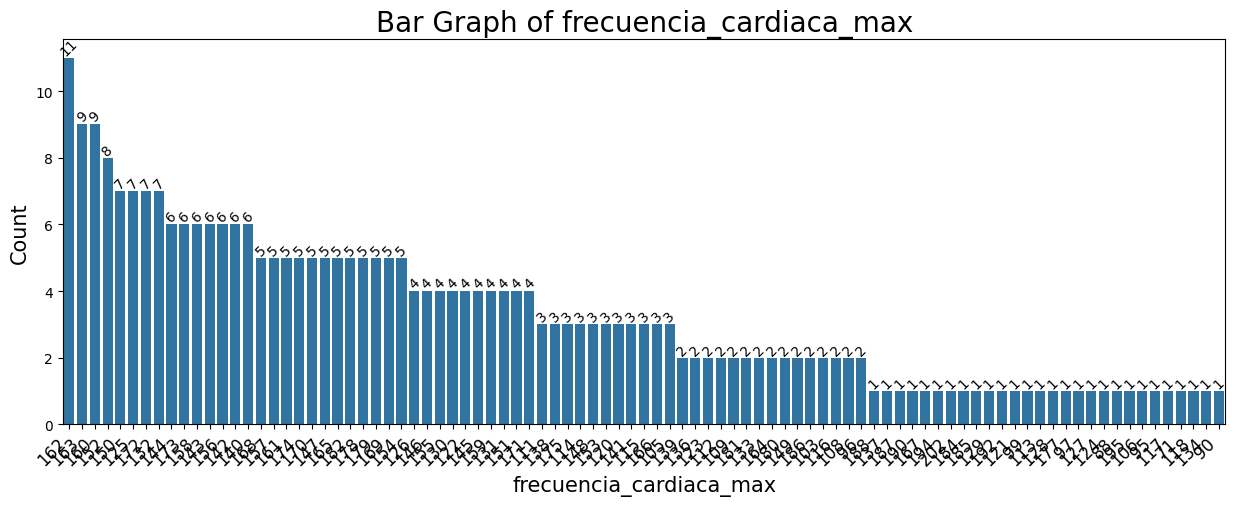

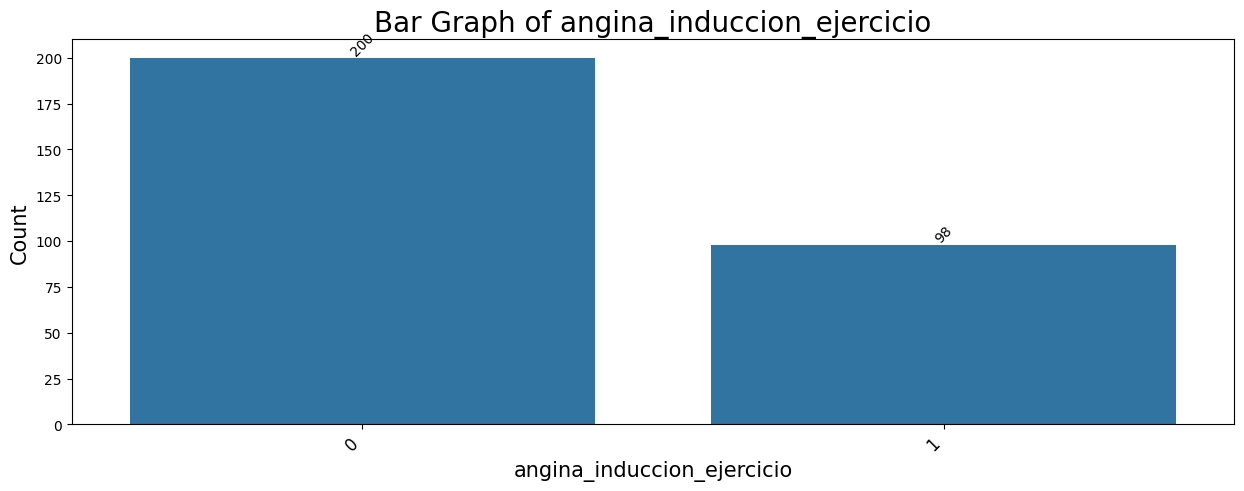

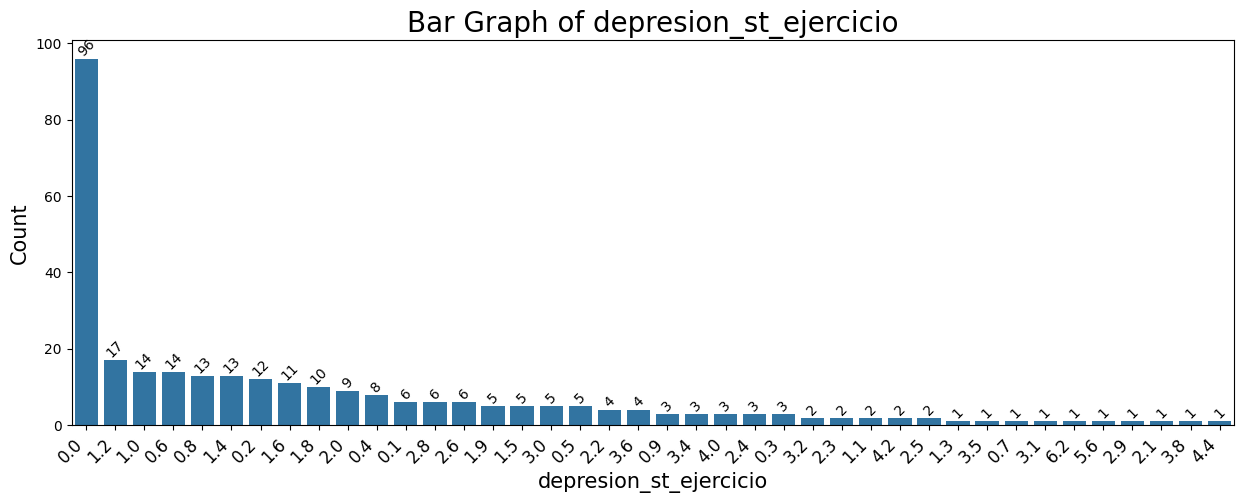

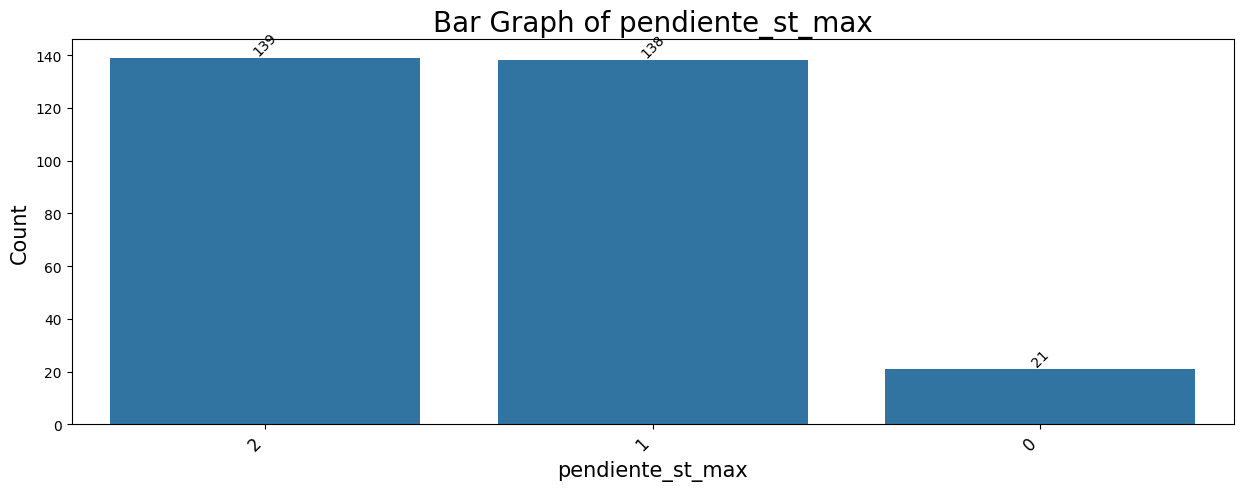

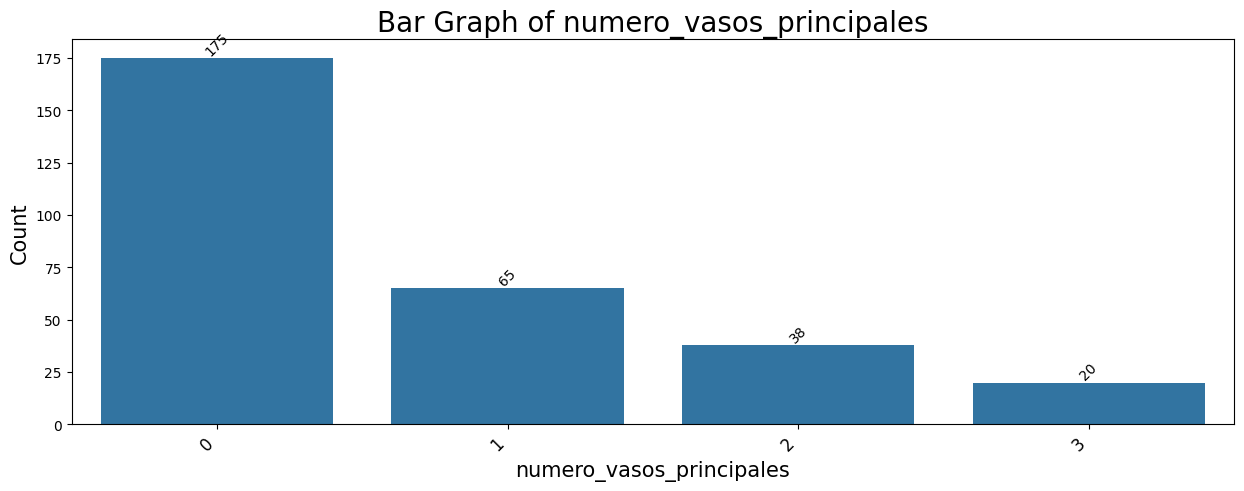

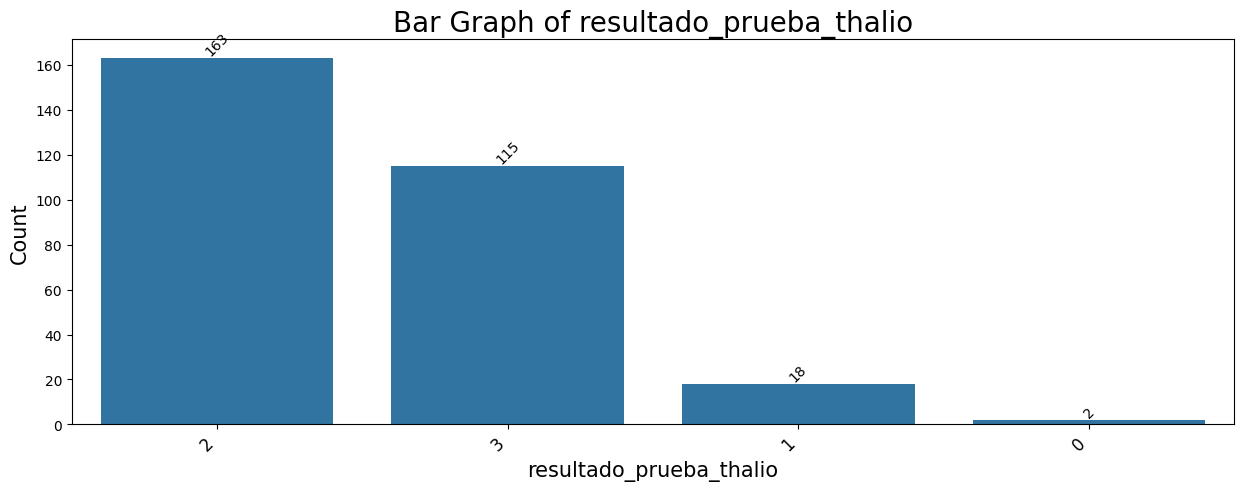

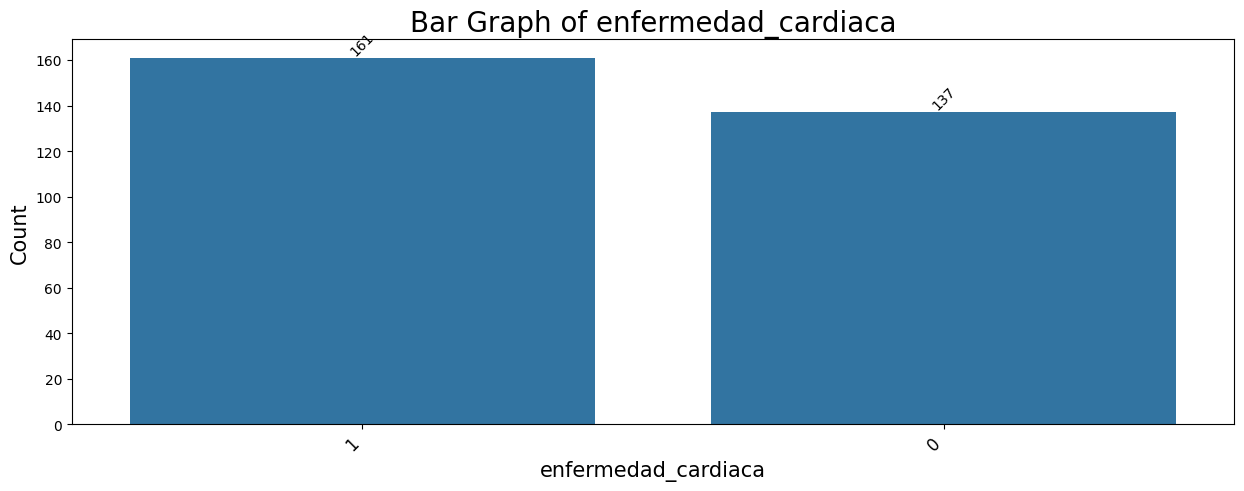

In [32]:
# sacamos grafica de barras para cada caracteristica del data set
import plotly.graph_objects as go

#obersvar distribucion de las variables categoricas
#con gradfico de barras o histogramas
def plot_bar_graphs(df, columns):
  for column in columns:
    plt.figure(figsize = (15,5))
    ax = sns.countplot(x = column, data = df,
                       order = df[column].value_counts().index)
    ax.bar_label(ax.containers[0], rotation = 45)
    plt.xlabel (column, fontsize=15)
    plt.ylabel('Count', fontsize = 15)
    plt.title(f'Bar Graph of {column}', fontsize = 20) #Formatear columnna
    plt.xticks(rotation = 45, ha = 'right', fontsize = 12)   
    plt.show()

columns = ['sexo','edad', 'tipo_dolor_toracico','presion_arterial_reposo', 'colesterol_serico', 
                'glucosa_ayunas_alta', 'electro_reposo', 'frecuencia_cardiaca_max', 'angina_induccion_ejercicio',
                'depresion_st_ejercicio', 'pendiente_st_max', 'numero_vasos_principales', 'resultado_prueba_thalio',
                'enfermedad_cardiaca']
plot_bar_graphs(data, columns)

- Graficas de relacion con respecto a nuestra categorizacion enfermedad cardiaca

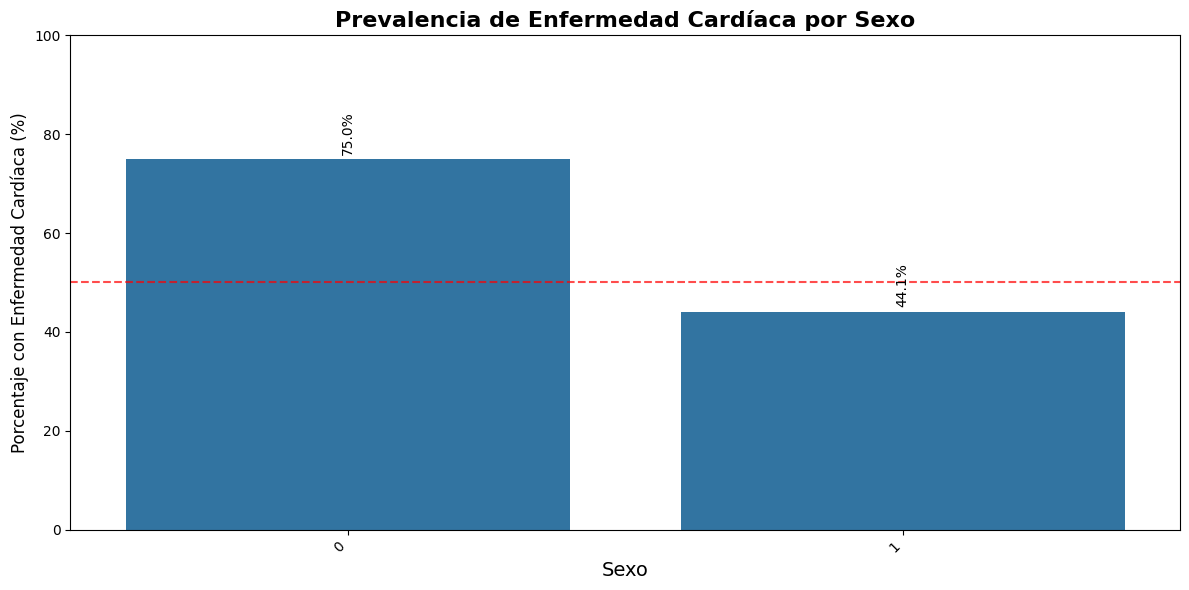

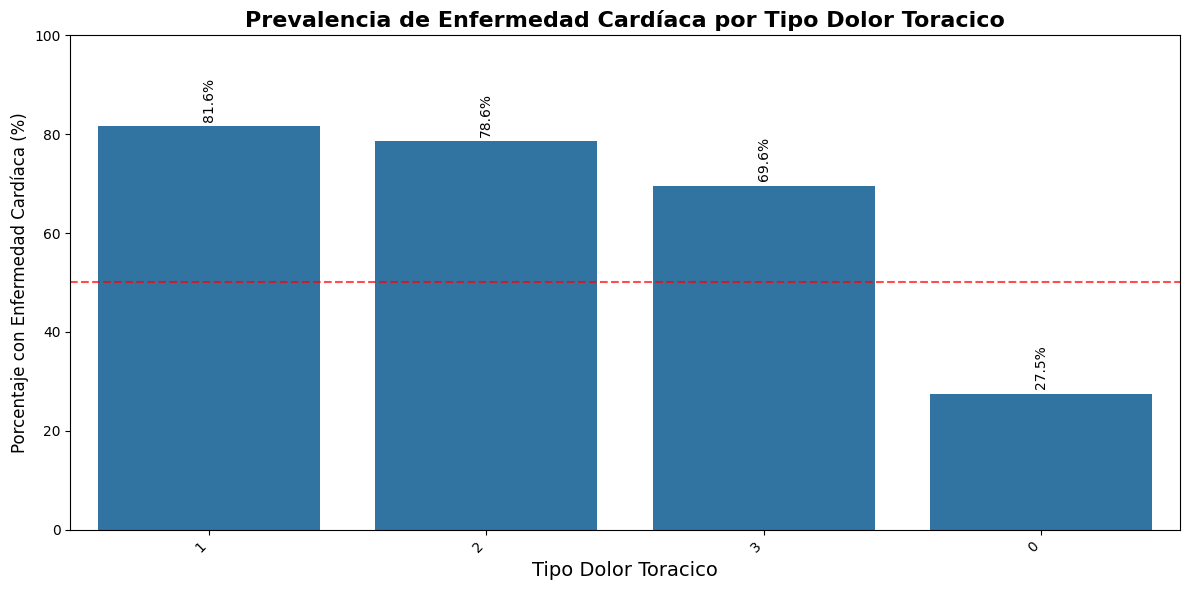

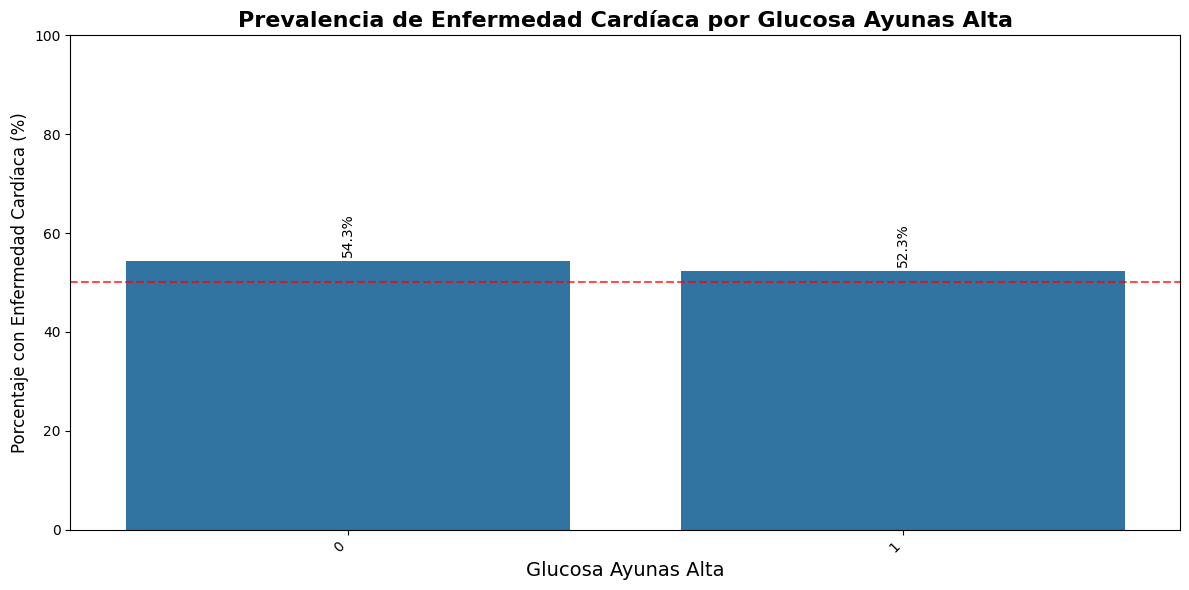

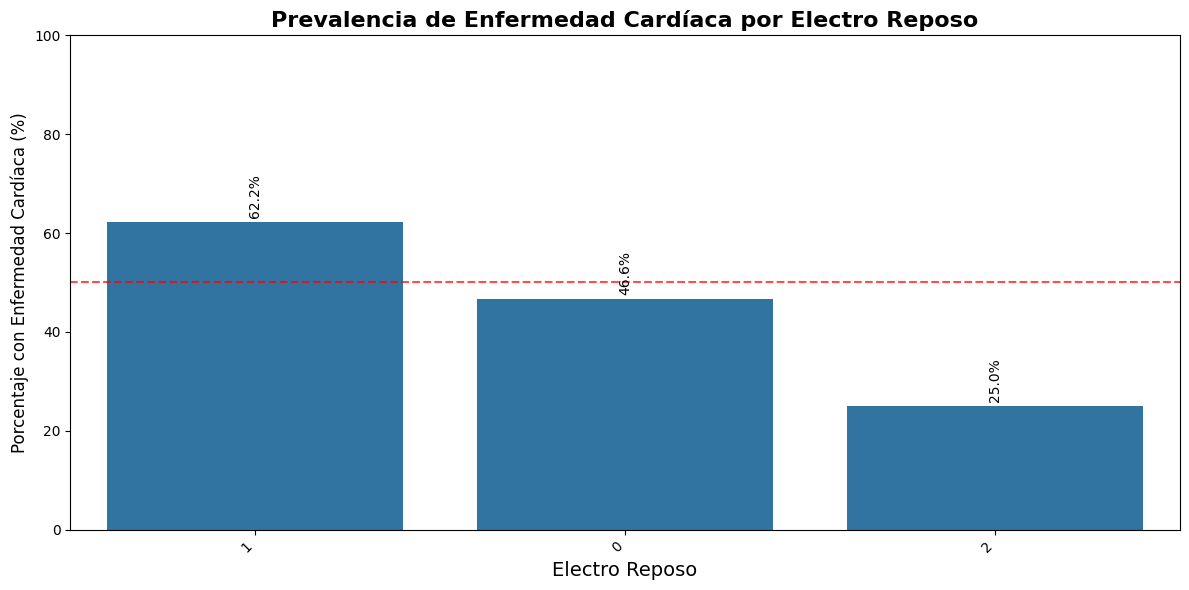

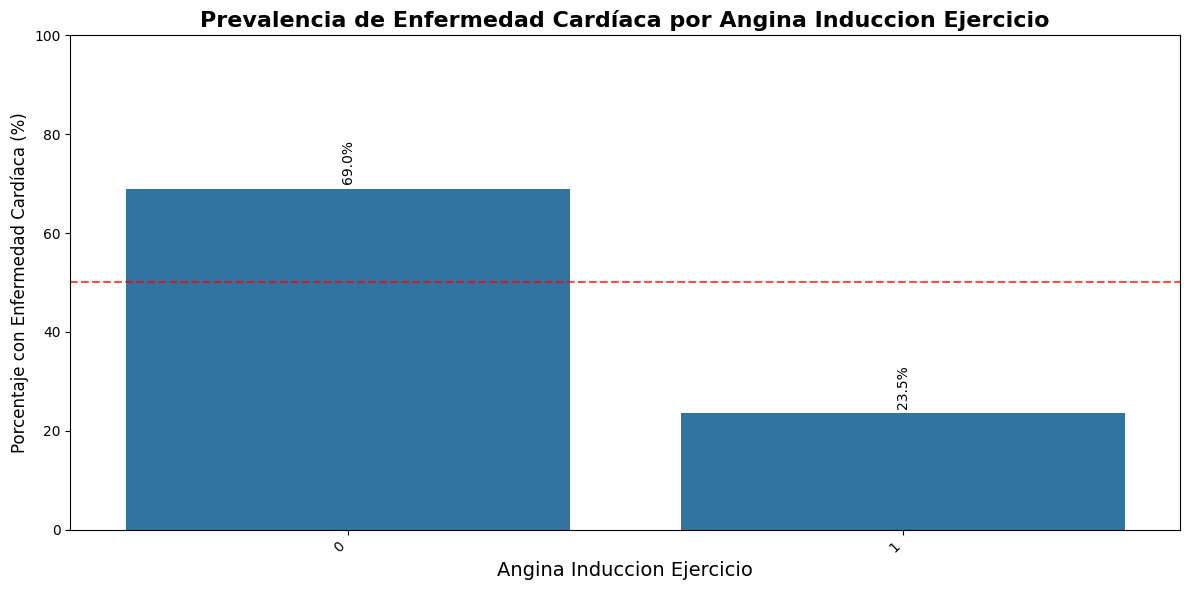

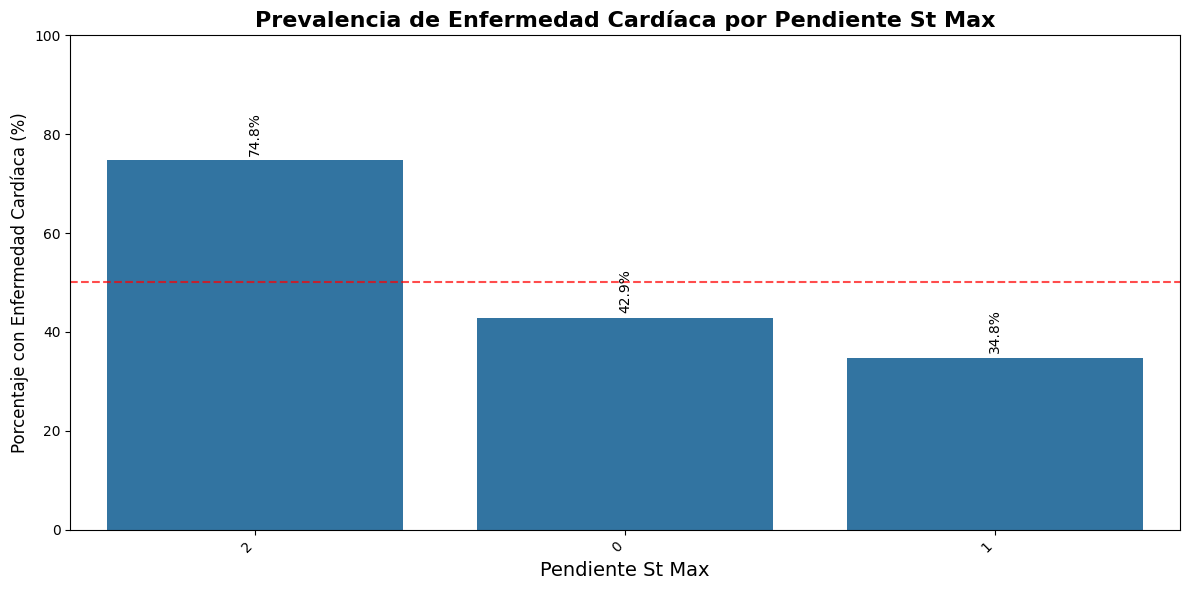

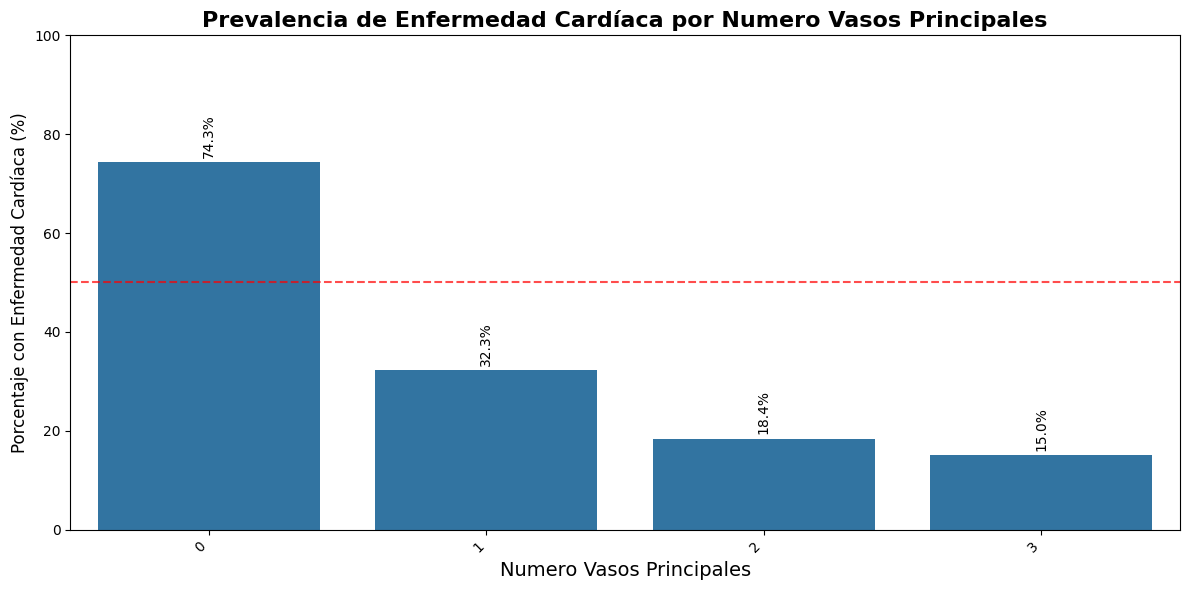

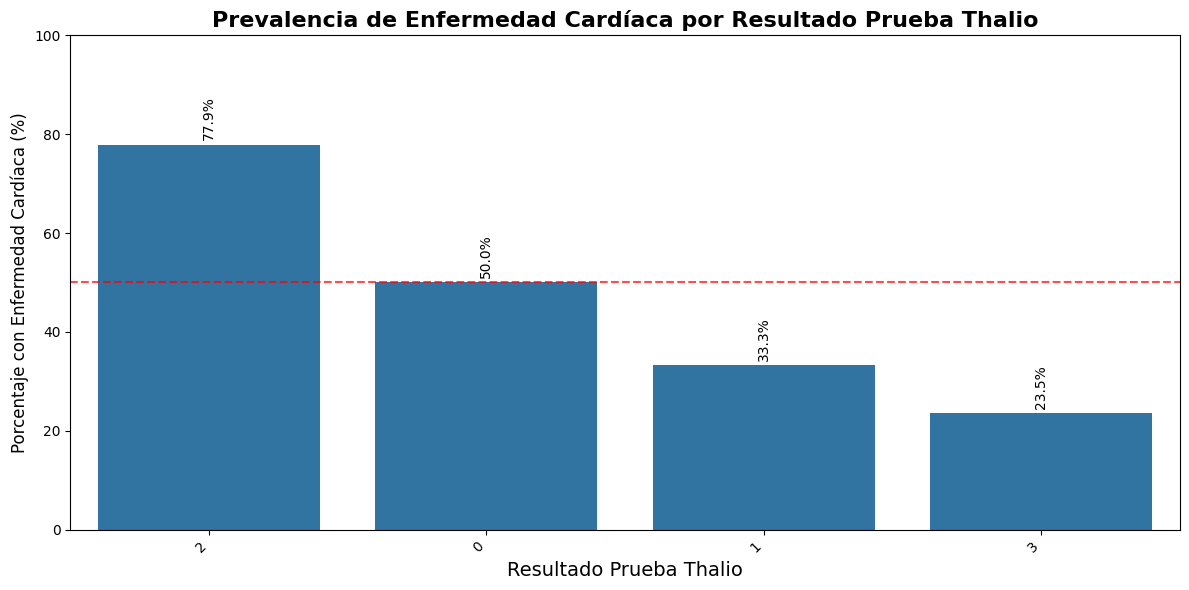

In [33]:
def plot_bar_with_enfermedad_cardiaca(df, columns):
    """
    Genera gráficas de barras mostrando la relación entre variables categóricas 
    y la presencia de enfermedad cardíaca
    
    Parameters:
    df: DataFrame con los datos
    columns: Lista de columnas categóricas a analizar
    """
    for column in columns:
        plt.figure(figsize = (12, 6))
        
        # Calcular el porcentaje de enfermedad cardíaca por categoría
        grouped_data = df.groupby(column)['enfermedad_cardiaca'].mean().round(3) * 100
        grouped_data = grouped_data.reset_index()
        
        # Ordenar de mayor a menor porcentaje
        grouped_data_sorted = grouped_data.sort_values(by = 'enfermedad_cardiaca', ascending = False)
        
        # Crear el gráfico de barras
        ax = sns.barplot(x = column, y = 'enfermedad_cardiaca', data = grouped_data_sorted,
                         order = grouped_data_sorted[column])
        
        # Añadir etiquetas con los porcentajes
        ax.bar_label(ax.containers[0], fmt = '%.1f%%', rotation = 90, padding = 3)
        
        # Configurar etiquetas y título
        plt.xlabel(column.replace('_', ' ').title(), fontsize = 14)
        plt.ylabel('Porcentaje con Enfermedad Cardíaca (%)', fontsize = 12)
        plt.title(f'Prevalencia de Enfermedad Cardíaca por {column.replace("_", " ").title()}', 
                  fontsize = 16, fontweight = 'bold')
        plt.xticks(rotation = 45, ha = 'right', fontsize = 10)
        plt.ylim(0, 100)  # Establecer límites del eje Y para porcentajes
        
        # Añadir línea de referencia al 50%
        plt.axhline(y = 50, color = 'red', linestyle = '--', alpha = 0.7, label = '50%')
        
        plt.tight_layout()
        plt.show()
    

# Definir las columnas categóricas que quieres analizar
columnas_categoricas = [
    'sexo', 
    'tipo_dolor_toracico', 
    'glucosa_ayunas_alta',
    'electro_reposo',
    'angina_induccion_ejercicio',
    'pendiente_st_max',
    'numero_vasos_principales',
    'resultado_prueba_thalio'
]

# Ejecutar la función
plot_bar_with_enfermedad_cardiaca(data, columnas_categoricas)

- Grafica de correlacion: heatmap

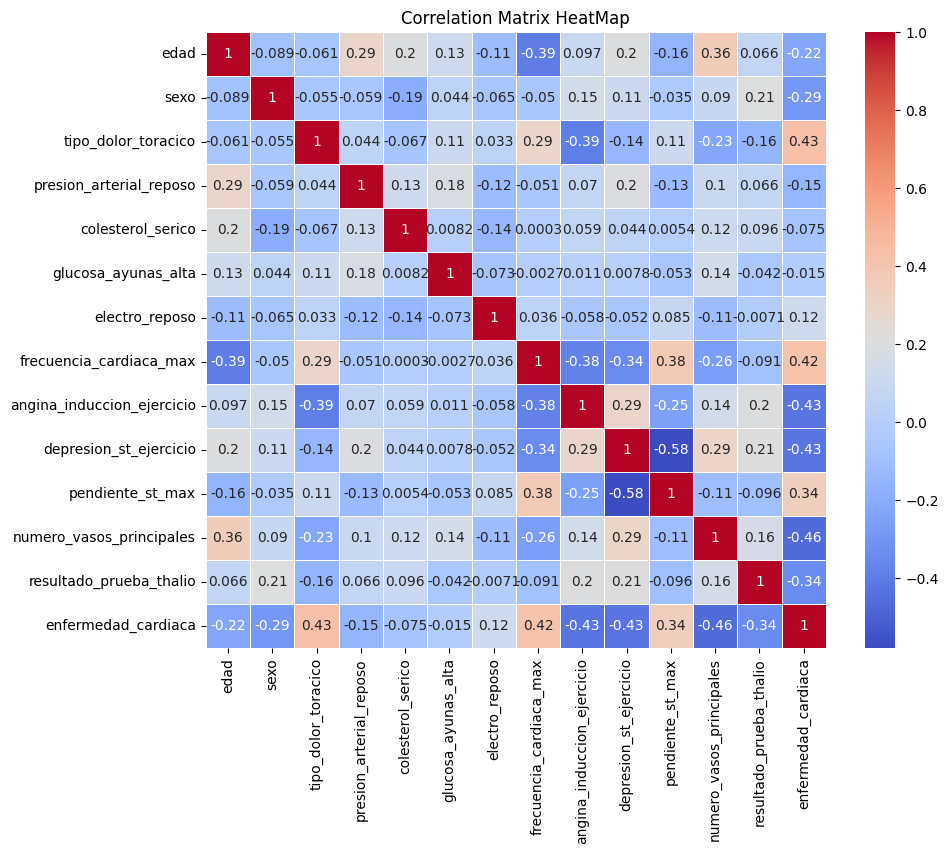

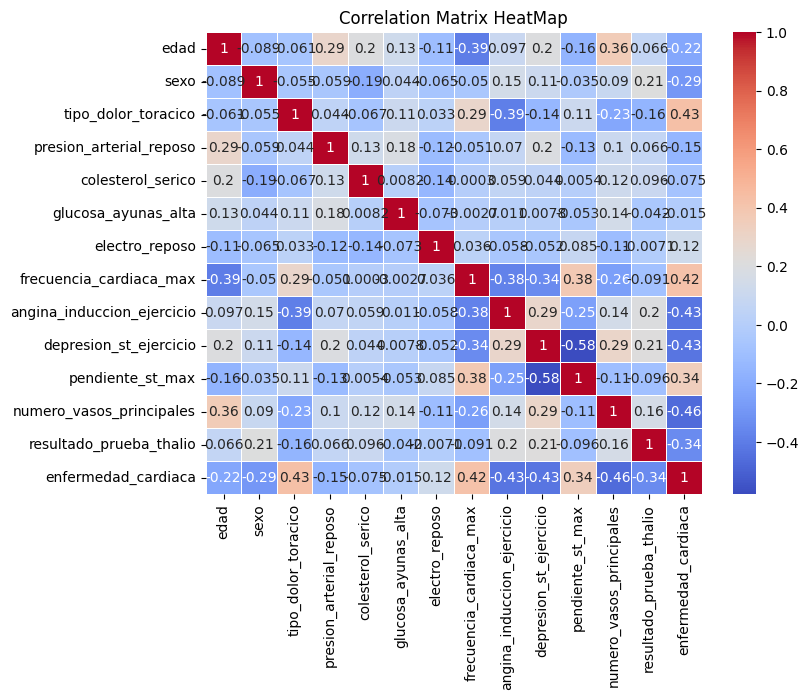

In [34]:
#Generar l amtriz de la correlación
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm',
            linewidths=0.5)
plt.title('Correlation Matrix HeatMap')
plt.show()


correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm',
            linewidths=0.5)
plt.title('Correlation Matrix HeatMap')
plt.show()

Nota: lo que podemos ver aqui, es que los coeficientes de pearson, son muy bajos, esto no dice que el data set sea inutil, si no mas bien que no es lineal o que ciertas caracteristicas no intercceionan entre si

- Grafica de cajas y bigotes boxplot

Número de columnas numéricas: 14


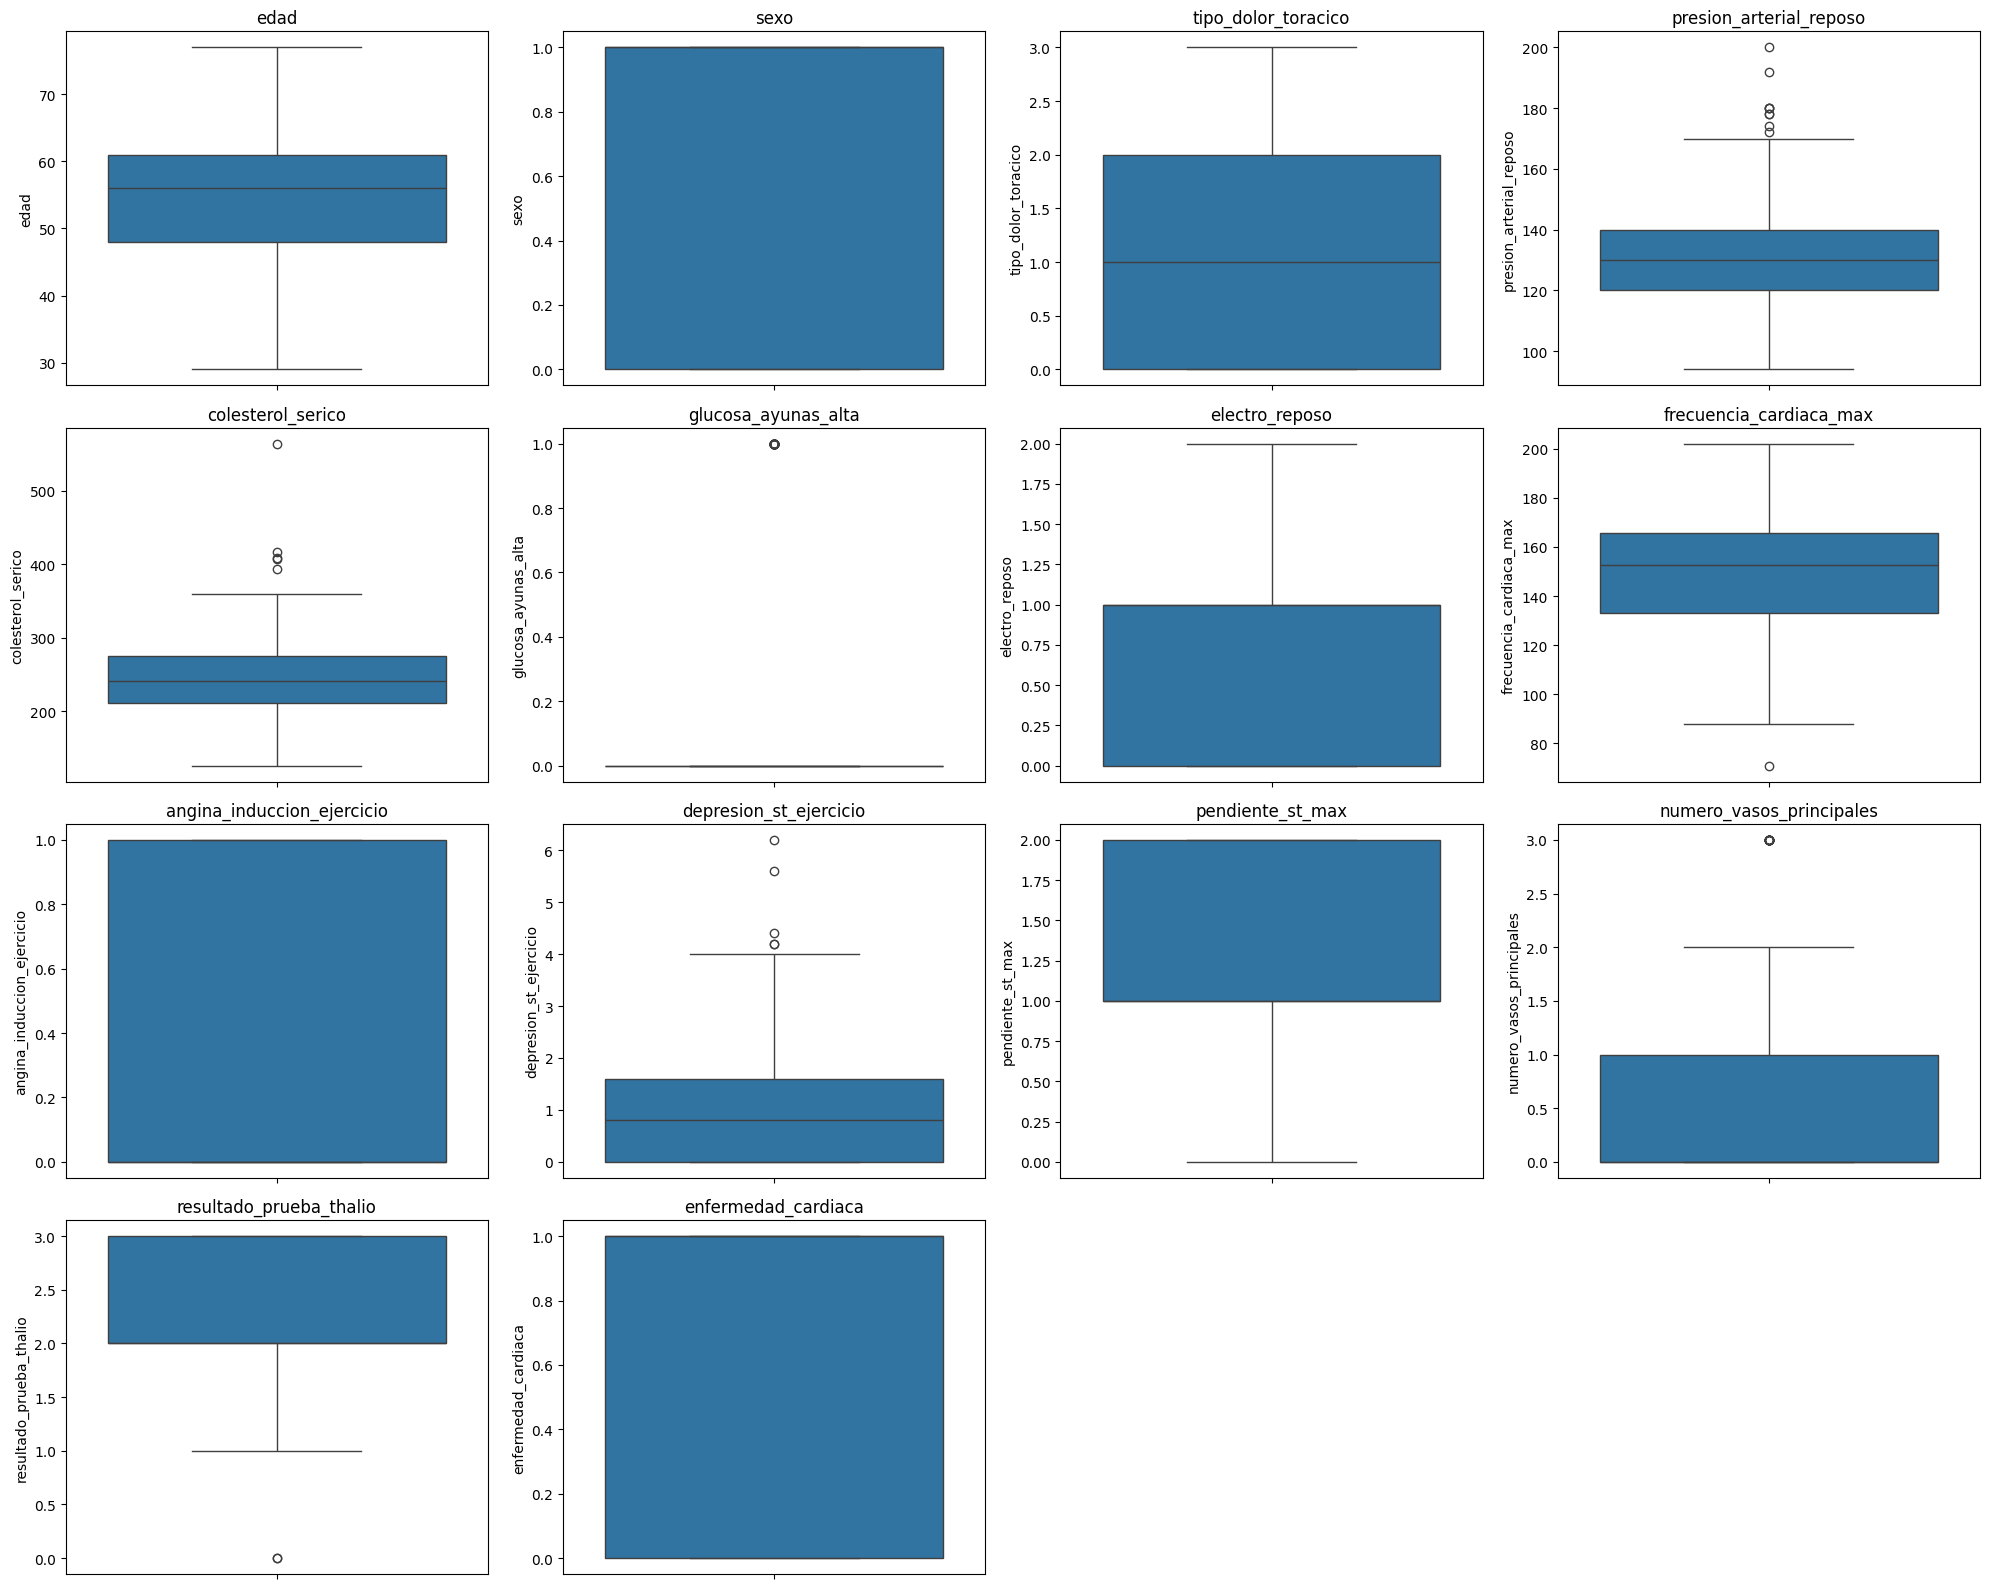

In [35]:
#grafica de cajas y bigotes boxplot
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns
num_columnas = len(columnas_numericas)

print(f"Número de columnas numéricas: {num_columnas}")

# Calcular el layout adecuado
filas = (num_columnas + 3) // 4  # Divide en filas de máximo 4 columnas
columnas = min(num_columnas, 4)

plt.figure(figsize=(5 * columnas, 4 * filas))
x = 0

for col in columnas_numericas:
    x += 1
    plt.subplot(filas, columnas, x)
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

- kurtosis

In [36]:
def calcular_curtosis_basica(columna, fisher=True):
    """
    Calcula el coeficiente de curtosis de una distribución.
    columna: Serie de pandas, array o lista con datos
    fisher: Si True (default), usa curtosis de Fisher (normal = 0)
            Si False, usa curtosis de Pearson (normal = 3)
    """
    # Limpiar datos
    datos_limpios = columna.dropna()
    datos_limpios = datos_limpios[np.isfinite(datos_limpios)]

    if len(datos_limpios) < 4:
        raise ValueError("Se necesitan al menos 4 datos para calcular curtosis")

    # Calcular curtosis
    return kurtosis(datos_limpios, fisher=fisher)


# Lista de columnas (asegúrate de que 'columns' esté definida)
columns = [
    'sexo', 'edad', 'tipo_dolor_toracico', 'presion_arterial_reposo', 
    'colesterol_serico', 'glucosa_ayunas_alta', 'electro_reposo', 
    'frecuencia_cardiaca_max', 'angina_induccion_ejercicio',
    'depresion_st_ejercicio', 'pendiente_st_max', 'numero_vasos_principales', 
    'resultado_prueba_thalio', 'enfermedad_cardiaca'
]

# Diccionario para almacenar resultados
resultados_curtosis = {}

# Calcular curtosis para cada columna - CORRECCIÓN AQUÍ
for columna in columns:
    resultados_curtosis[columna] = calcular_curtosis_basica(data[columna])  # ✅ Pasar df[columna] en lugar de solo columna

# Imprimir resultados
print("=== CURTOSIS DE LAS COLUMNAS ===")
for columna, curtosis in resultados_curtosis.items():
    print(f"{columna}: {curtosis}")

=== CURTOSIS DE LAS COLUMNAS ===
sexo: -1.420585808580859
edad: -0.5239724958316216
tipo_dolor_toracico: -1.1750948740394285
presion_arterial_reposo: 0.8502853358490112
colesterol_serico: 4.419208466168314
glucosa_ayunas_alta: 1.9459556191839633
electro_reposo: -1.3469066407242913
frecuencia_cardiaca_max: -0.0975873482955274
angina_induccion_ejercicio: -1.4691836734693882
depresion_st_ejercicio: 1.4812843552816126
pendiente_st_max: -0.6393432519871278
numero_vasos_principales: 0.22303656459274546
resultado_prueba_thalio: 0.27503301665904756
enfermedad_cardiaca: -1.9738858412295415


Aqui podemos ver como se comportan las curtosis de cada columna, donde lo mas cerca a 0 son una curtosis normales, y las que pasan por encima de 0.99 empiezan a presentar pico alto y colas pesadas, y las que pasan de -0.99 empiezan a presentar pico bajo y colas ligeras.
En nuestro caso hay 3 caracteristicas criticas que prersentan picos altos y colas pesadas

-- colesterol_serico: 4.4192...

-- glucosa_ayunas_alta: 1.9459... esta podemos descartarla ya que es binaria

-- depression_st_ejercicio: 1.4812...

- kurtosis criticas 


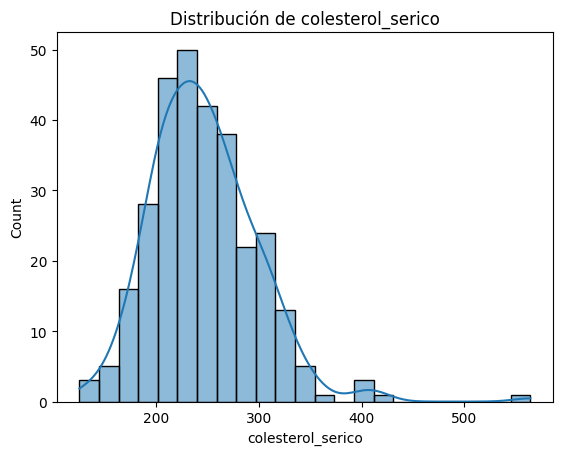

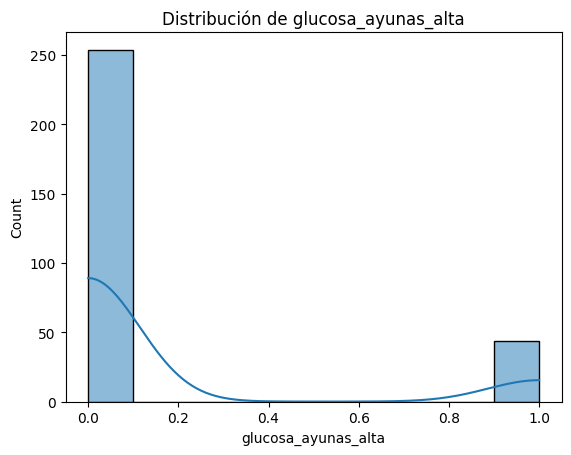

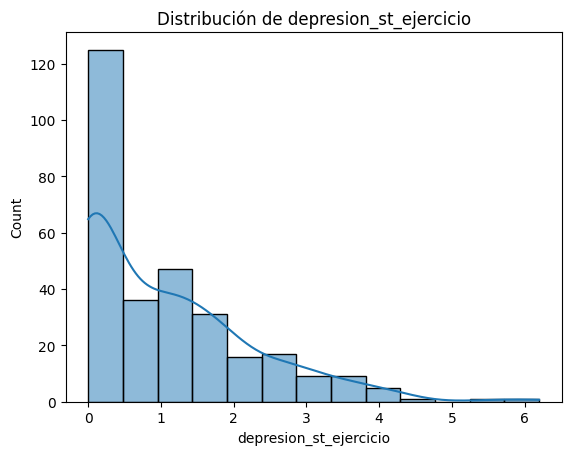

In [37]:
# graficas historicas de las caracteriscas con una curtosis con outliers(leptocurtica)
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['colesterol_serico', 'glucosa_ayunas_alta','depresion_st_ejercicio']:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

- Sesgo

In [38]:
def calcular_sesgo_basico(columna):
    """
    Calcula el coeficiente de sesgo de una distribución usando scipy.stats.skew.
    """
    # Limpiar datos
    datos_limpios = columna.dropna()
    datos_limpios = datos_limpios[np.isfinite(datos_limpios)]

    if len(datos_limpios) < 3:
        raise ValueError("Se necesitan al menos 3 datos para calcular el sesgo")

    # Calcular sesgo
    return skew(datos_limpios)


resultados_sesgo = {}

# Calcular sesgo para cada columna 
for columna in columns:
    resultados_sesgo[columna] = calcular_sesgo_basico(data[columna])  

# Imprimir resultados
print("=== Sesgo DE LAS COLUMNAS ===")
for columna, sesgo in resultados_sesgo.items():
    print(f"{columna}: {sesgo}")

=== Sesgo DE LAS COLUMNAS ===
sexo: -0.7611926112483893
edad: -0.2095004473502061
tipo_dolor_toracico: 0.5015331744036972
presion_arterial_reposo: 0.7132977630724394
colesterol_serico: 1.1337845783276026
glucosa_ayunas_alta: 1.9864429564384585
electro_reposo: 0.18355418343901383
frecuencia_cardiaca_max: -0.5235663764627861
angina_induccion_ejercicio: 0.7285714285714282
depresion_st_ejercicio: 1.2433776088952642
pendiente_st_max: -0.5020673913374819
numero_vasos_principales: 1.1784867095749532
resultado_prueba_thalio: -0.4792301413353139
enfermedad_cardiaca: -0.16159875856719455


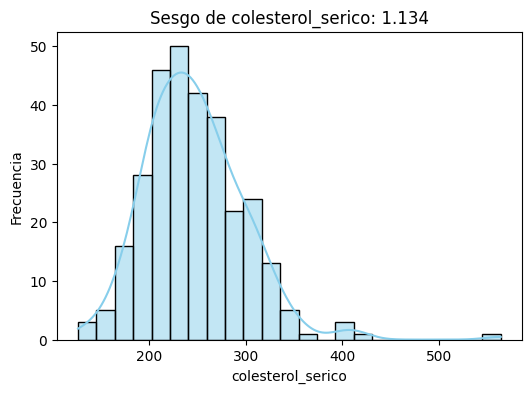

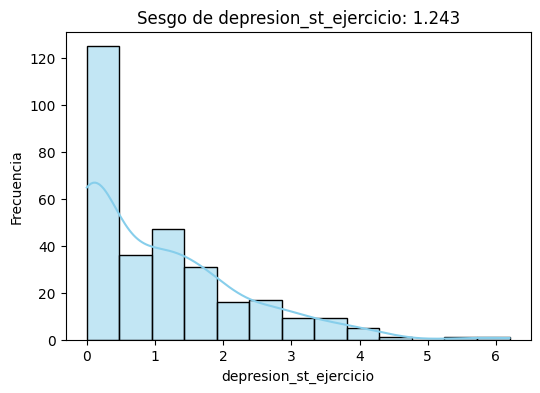

In [39]:


# grafica para ver el sesgo
for col in  ['colesterol_serico',  'depresion_st_ejercicio']:
    s = skew(data[col])
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Sesgo de {col}: {s:.3f}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

## Entrenamiento - Implementacion de K-NN

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ajuste de los datos para evitar mostrar datos respuesta al algoritmo
X = data.drop("enfermedad_cardiaca", axis=1)  # Todas las columnas excepto la salida
Y = data["enfermedad_cardiaca"]               # Columna objetivo


# divicion del dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# implementacioon del algoritmo
knn = KNeighborsClassifier(n_neighbors=5)  # K=5 por defecto
knn.fit(X_train, y_train) # entrenamiento


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
# hacer predicciones
y_pred = knn.predict(X_test)


# mostrar datos evlauacion de aprendizaje 
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))



Exactitud: 0.6833333333333333

Matriz de confusión:
 [[14  9]
 [10 27]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.58      0.61      0.60        23
           1       0.75      0.73      0.74        37

    accuracy                           0.68        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.69      0.68      0.68        60



## Regreion logistica y matriz de confusion

Exactitud: 0.80

Matriz de confusión:
 [[15  8]
 [ 4 33]]


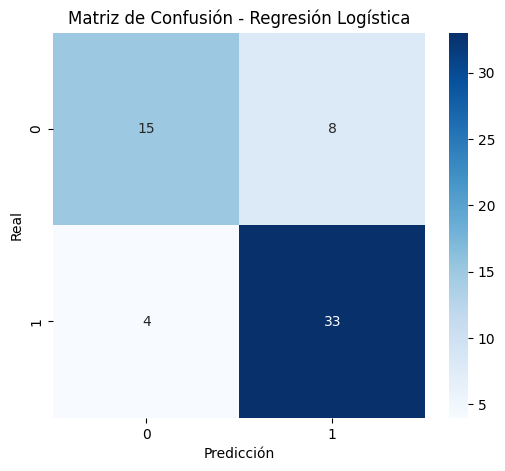


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.65      0.71        23
           1       0.80      0.89      0.85        37

    accuracy                           0.80        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.80      0.80      0.80        60



In [42]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas del dataset
columns = [
    'sexo', 'edad', 'tipo_dolor_toracico', 'presion_arterial_reposo', 
    'colesterol_serico', 'glucosa_ayunas_alta', 'electro_reposo', 
    'frecuencia_cardiaca_max', 'angina_induccion_ejercicio',
    'depresion_st_ejercicio', 'pendiente_st_max', 'numero_vasos_principales', 
    'resultado_prueba_thalio', 'enfermedad_cardiaca'
]


# Suponiendo que tu dataset está en un DataFrame llamado data
X = data.drop("enfermedad_cardiaca", axis=1)  # Todas las columnas excepto la salida
y = data["enfermedad_cardiaca"]               # Columna objetivo

# Escalar los datos para regresión logística
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Crear e implementar regresión logística
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Hacer predicciones
y_pred = logreg.predict(X_test)

# Evaluar resultados
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}\n")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

# Mostrar matriz de confusión de forma más visual
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# Reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
